# Principal Component Analysis (PCA) on Iris Dataset

In this notebook, we will apply **Principal Component Analysis (PCA)** to the **Wine dataset**. PCA is a dimensionality reduction technique that helps in reducing the number of features while preserving the variance in the data.

## Steps:
1. **Load the dataset**
3. **Standardize the data**
4. **Apply PCA**
5. **Visualize the results**
6. **Interpret the explained variance**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 1: Load the wine dataset
winedata = pd.read_csv('Datasets/WineData.csv')
winedata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
#remove id from the dataset
winedata.drop('Id', axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [4]:
# Define the features and target
X = winedata.drop('quality', axis=1)
y = winedata['quality']

Standardize the data to ensure that PCA works optimally, since PCA is sensitive to the scale of the data.

In [5]:
# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Check the mean and standard deviation after scaling
np.mean(X_scaled, axis=0), np.std(X_scaled, axis=0)

(array([-3.72988313e-16,  4.47585975e-16,  2.48658875e-17,  1.55411797e-16,
         8.08141344e-17, -5.59482469e-17,  9.94635501e-17,  5.78380544e-14,
        -8.45440176e-16,  4.97317750e-17, -1.19356260e-15,  0.00000000e+00]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

The data has been standardized, which ensures that each feature has a mean of 0 and a standard deviation of 1. We can now apply PCA to reduce the dataset to two principal components.

In [7]:
# Step 3: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
X_pca = pca.fit_transform(X_scaled)

In [8]:
# Check the shape of the PCA-transformed data
X_pca.shape

(1143, 2)

We have reduced the dataset to 2 principal components. Next, let's visualize the transformed data in a 2D plot.

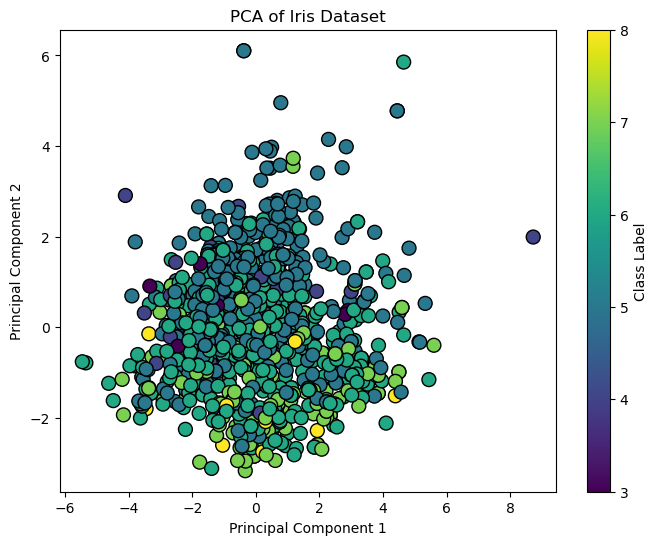

In [9]:
# Step 4: Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class Label')
plt.show()

The scatter plot above shows the first two principal components of the Iris dataset. Each point is color-coded according to its class label (species of Iris).

Next, let's check the **explained variance** to see how much of the original data's variance is captured by the two principal components.

In [10]:
# Step 5: Explained Variance
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')
print(f'Total Variance Explained by 2 Components: {sum(pca.explained_variance_ratio_)}')

Explained Variance Ratio: [0.27194409 0.15872089]
Total Variance Explained by 2 Components: 0.4306649780308682
